In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

In [42]:
dataframe = pd.read_csv('C:/Users/atirkey/OneDrive - Kmart Australia Limited/Downloads/Control.csv')

In [44]:
geography_mapping = {
    "W.A": 1, "N.T": 2, "S.A": 3, "QLD": 4, 
    "NSW": 5, "VIC": 6, "ACT": 7, "TAS": 8,
    "NTH": 9, "STH": 10, "undefined": 11
}
dataframe["STATE"] = dataframe["STATE"].map(geography_mapping)

In [45]:
categorical_features = ['STORE_TYPE', 'AREA', 'COUNTRY']
dataframe_encoded = pd.get_dummies(dataframe[categorical_features], drop_first=True)
categorical_columns = pd.concat([dataframe[['STATE']], dataframe_encoded], axis=1)
numerical_columns = ['AVERAGE_BASKET_SIZE', 'NO_OF_TRANSACTIONS', 'AVG_BASKET_DOLLARS',
                     'TOTAL_SALES_UNITS', 'TOTAL_SALES_DOLLARS']
clustering_data = pd.concat([dataframe[numerical_columns], categorical_columns], axis=1)
print(clustering_data.head())

   AVERAGE_BASKET_SIZE  NO_OF_TRANSACTIONS  AVG_BASKET_DOLLARS  \
0             4.626419              821532           35.233343   
1             4.761170              823819           38.876479   
2             4.937985              717326           39.095888   
3             4.385563             1281232           33.482181   
4             6.093344              421301           53.169664   

   TOTAL_SALES_UNITS  TOTAL_SALES_DOLLARS  STATE  STORE_TYPE_KMART  \
0            3955732          28945318.76      5              True   
1            4155395          32027181.97      1              True   
2            3622351          28044496.71      4              True   
3            5819144          42898442.12      4              True   
4            2663720          22400432.81      2              True   

   STORE_TYPE_undefined  AREA_Inner Regional  AREA_Middle Metro  \
0                 False                False              False   
1                 False                False    

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clustering_data[numerical_columns] = scaler.fit_transform(clustering_data[numerical_columns])
print(clustering_data.head())

   AVERAGE_BASKET_SIZE  NO_OF_TRANSACTIONS  AVG_BASKET_DOLLARS  \
0             0.000057            0.439976            0.000063   
1             0.000060            0.441201            0.000063   
2             0.000062            0.384168            0.000063   
3             0.000054            0.686171            0.000063   
4             0.000081            0.225630            0.000064   

   TOTAL_SALES_UNITS  TOTAL_SALES_DOLLARS  STATE  STORE_TYPE_KMART  \
0           0.444665             0.408292      5              True   
1           0.467109             0.451762      1              True   
2           0.407190             0.395586      4              True   
3           0.654130             0.605104      4              True   
4           0.299432             0.315975      2              True   

   STORE_TYPE_undefined  AREA_Inner Regional  AREA_Middle Metro  \
0                 False                False              False   
1                 False                False    

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 153.7025005919245
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 153.7025005919245
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 153.7025005919245
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 153.7025005919245
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 153.7025005919245
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 69, ncos

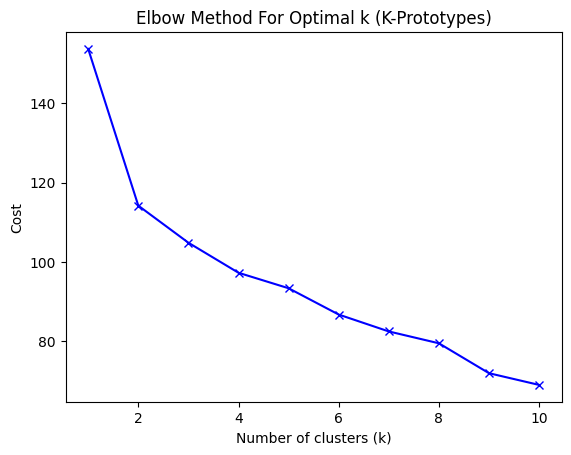

In [51]:
# Elbow method to find optimal k
cost = []
K = range(1,11)  # Try k between 1 and 5
for num_clusters in K:
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', n_init=5, verbose=1)
    kproto.fit_predict(clustering_data, categorical=[0] + list(range(len(numerical_columns), clustering_data.shape[1])))
    cost.append(kproto.cost_)

# Plot the elbow graph
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k (K-Prototypes)')
plt.show()

In [48]:
kproto = KPrototypes(n_clusters=3, init='Cao', n_init=5, verbose=1)
clusters = kproto.fit_predict(clustering_data, categorical=[0] + list(range(len(numerical_columns), clustering_data.shape[1])))

# Add cluster labels to the original dataframe
dataframe['cluster'] = clusters

# View the clustering result
print(dataframe.head())


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 80, ncost: 106.50881972642519
Run: 1, iteration: 2/100, moves: 4, ncost: 106.31332461417601
Run: 1, iteration: 3/100, moves: 1, ncost: 106.31132643267367
Run: 1, iteration: 4/100, moves: 0, ncost: 106.31132643267367
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 166, ncost: 110.91279670118162
Run: 2, iteration: 2/100, moves: 66, ncost: 104.6767472255646
Run: 2, iteration: 3/100, moves: 23, ncost: 104.26436526162699
Run: 2, iteration: 4/100, moves: 6, ncost: 104.24476998425305
Run: 2, iteration: 5/100, moves: 2, ncost: 104.24241813757969
Run: 2, iteration: 6/100, moves: 0, ncost: 104.24241813757969
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 28, ncost: 107.349932487100

In [49]:
cluster_counts = dataframe['cluster'].value_counts()
cluster_profiles = dataframe.groupby('cluster')[['STATE', 'COUNTRY', 'STORE_TYPE', 'AREA']].agg(lambda x: x.mode()[0])
cluster_profiles['Count'] = dataframe['cluster'].value_counts()
print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
         STATE    COUNTRY STORE_TYPE            AREA  Count
cluster                                                    
0            6  AUSTRALIA      KMART     Outer Metro    161
1            5  AUSTRALIA      KMART    Middle Metro    108
2           11  AUSTRALIA      K-HUB  Outer Regional     92


In [50]:
dataframe.to_csv('kprototype3.csv', index=False)